# <center>Laboratorium 6<br>Metody Numeryczne<br>Całkowanie Numeryczne</center>

Zadanie 1

$ f(x) = e^{-2x} => F(x) = -\frac{1}{2} e^{-2x}$

1)
$\int_{0}^{1}f(x)dx = F(1) - F(0) = -\frac{1}{2} e^{-2} + \frac{1}{2} e^{0} =  \frac{1}{2}(1-e^{-2}) \approx 0.43233...$ 

In [1]:
import math
exact = 1/2*(1-math.exp(-2))

In [2]:
#2
def f(x):
    return math.exp(-2*x)

n = 1000 #ilosc punktów na przedziale [0;1]
a = 0
b = 1
dx = (b-a)/n
integral =0;
for i in range (1,n+1):
    integral += f(a+i*dx)
integral *= dx #S = suma f(x_i)dx = dx*(suma f(x_i))
print('Metoda prostokątów ',integral)
print('Błąd ',abs(integral - exact ))

Metoda prostokątów  0.43190017013408843
Błąd  0.0004321882476052141


In [3]:
#3 
a = 0
b = 1
dx = (b-a)/2
integral = dx*(f(a)+f(b))
print('Metoda prostych trapezów ',integral)
print('Błąd ',abs(integral - exact ))

Metoda prostych trapezów  0.5676676416183064
Błąd  0.13533528323661276


In [4]:
#4
#https://pl.wikipedia.org/wiki/Metoda_Simpsona
a = 0
b = 1
dx = (b-a)/6
integral = dx*(f(a)+4*f((a+b)/2)+f(b))
print('Metoda prosta Simpsona ',integral)
print('Błąd ',abs(integral - exact ))

Metoda prosta Simpsona  0.4344755079870637
Błąd  0.0021431496053700427


In [5]:
#5
n = 1000 #ilosc punktów na przedziale [0;1]
a = 0
b = 1
dx = (b-a)/n
integral =0;
for i in range (0,n):
    integral += (f(a+(i)*dx)+f(a+(i+1)*dx))/2
integral *= dx #S = suma 1/2(f(x_i)+f(x_i+1))dx = dx*(suma 1/2(f(x_i)+f(x_i+1)))
print('Metoda złożonych trapezów ',integral)
print('Błąd ',abs(integral - exact ))

Metoda złożonych trapezów  0.43233250249247046
Błąd  1.4411077681186768e-07


In [6]:
#6
n = 1000 #ilosc punktów na przedziale [0;1]
a = 0
b = 1
dx = (b-a)/n
integral =0;
for i in range (0,n):
    integral += (f(a+(i)*dx)+4*f((a+(i)*dx+a+(i+1)*dx)/2)+f(a+(i+1)*dx))/6
integral *= dx #S = suma 1/6(f(x_i)++4f((x_i+x_i+1)/2)+f(x_i+1))dx 
print('Metoda złożona Simpsona ',integral)
print('Błąd ',abs(integral - exact ))

Metoda złożona Simpsona  0.4323323583816969
Błąd  3.2751579226442118e-15


In [7]:
#7
import scipy.integrate
integral_romberg = scipy.integrate.romberg(f,0,1,tol=math.pow(10,-8))
print('Metoda Romberga ',integral_romberg)
print('Błąd ',abs(integral_romberg - exact ))

Metoda Romberga  0.43233235838169437
Błąd  7.216449660063518e-16


In [8]:
#8
integral_quad = scipy.integrate.quad(f,0,1)
print('Metoda quad ',integral_quad[0])
print('Błąd ',abs(integral_quad[0] - exact ))

Metoda quad  0.4323323583816936
Błąd  5.551115123125783e-17


Najbardziej zbliżone wyniki daje złożona metoda Simpsona, metoda Romberga i metoda quad

Zadanie 2

In [9]:
import scipy.misc
import scipy.stats


f = lambda t:1/math.sqrt(2*math.pi)*math.exp(-math.pow(t,2)/2)
eps = math.pow(10,-5)
p = 0.5
val = 0.45

def trap(b):
    a = 0;
    n = 100;
    dx = (b-a)/n
    integral =0;
    for i in range (0,n):
        integral += (f(a+(i)*dx)+f(a+(i+1)*dx))/2
    integral *= dx
    return integral

def simp(b):
    n = 100 
    a = 0
    dx = (b-a)/n
    integral =0;
    for i in range (0,n):
        integral += (f(a+(i)*dx)+4*f((a+(i)*dx+a+(i+1)*dx)/2)+f(a+(i+1)*dx))/6
    integral *= dx
    return integral

g = lambda x : trap(x) - 0.45
h = lambda x : simp(x) - 0.45

def newton(f,df,x0,epsilon,max_it):
    x = x0 - f(x0)/df(x0)
    y = x0
    iter =0
    while abs(x-y)>epsilon and iter<max_it:
        iter+=1
        y = x
        x = y - f(y)/df(y)
    return x
ref = scipy.stats.norm.ppf(0.45+scipy.stats.norm.cdf(0))
trapezy = newton(g,f,p,eps,100)
simpson = newton(h,f,p,eps,100)
print('Obliczone metodą trapezów: ',trapezy,' błąd: ',abs(trapezy-ref))
print('Obliczone metodą Simpsona: ',simpson,' błąd: ',abs(simpson-ref))
print('Wartość referencyjna ', ref)
#Widać że dokładniejsza jest metoda Simpsona (o rząd 10^6)

Obliczone metodą trapezów:  1.6448907135693673  błąd:  3.708661789514345e-05
Obliczone metodą Simpsona:  1.6448536269391643  błąd:  1.2307932450994485e-11
Wartość referencyjna  1.6448536269514722


Zadanie 3

In [10]:
t = [0.0, 0.5, 1.0, 2.0, 3.0, 4.0]
a = [-4.5, -4.5, -2.3, -1.0, -0.5, 0.0]

import numpy
#a s = int(int(a(t)dt)dt)

#b v_sr = int_a^b(a(t) dt)


#wiemy że prędkość wyraża się wzorem v(t) = v(t0) + int_(t0)^(t) (a(t)dt) - z tego faktu obliczam prędkości dla każdego t
v = scipy.interpolate.InterpolatedUnivariateSpline(t,a,k=3)

v_temp = [scipy.integrate.quad(v,0,i)[0] for i in t] #dla funkcji pierwotnej C=0
C = -v_temp[len(v_temp)-1] #tyle trzeba dodać żeby v(4) = 0 => C=v(0)
v_points = [i+C for i in v_temp] #punkty prędkości spełniające warunek v(4) = 0
v = scipy.interpolate.InterpolatedUnivariateSpline(t,v_points,k=3)

s = abs(scipy.integrate.quad(v,0,4)[0])
print('Droga hamowania ',s,' m')

s1 = abs(scipy.integrate.quad(v,0,0.5)[0])
t = 0.5 - 0
print('Predkość średnia ',s1/t, ' m/s')


Droga hamowania  6.331502525049489  m
Predkość średnia  5.2192392676779775  m/s


Zadanie 4

Złożone trapezy:  11.063484774497711
Złożony Simpson:  11.063484774497724
Romberg integration of <function vectorize1.<locals>.vfunc at 0x7fea20209488> from [0, 4.8]

 Steps  StepSize   Results
     1  4.800000 -0.000000 
     2  2.400000 -0.000000 -0.000000 

The final result is -1.4107931126177507e-15 after 3 function evaluations.
Romberg:  -1.4107931126177507e-15


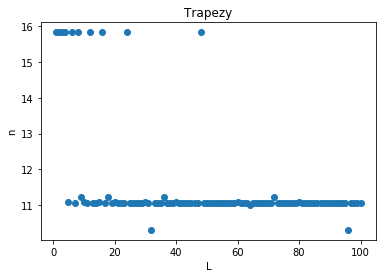

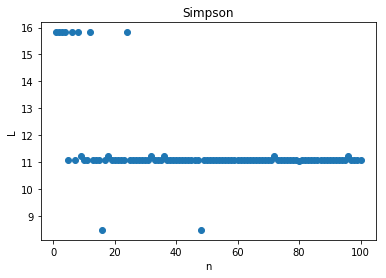

In [12]:
l0 = 0
l1 = 4.8

A = 0.1;
T = 0.2;

f = lambda x: A*math.sin(2*math.pi*x/T)

df = lambda x:2*math.pi*A/T*math.cos(2*math.pi*x/T)

l = lambda x: math.sqrt(1+math.pow(df(x),2))

n = 1000
#L = int(sqrt(1+f'(x)^2))

#metoda złożonych trapezów
def trapezy(n):
    dx = (l1-l0)/n
    integral =0;
    for i in range (0,n):
        integral += (l(l0+(i)*dx)+l(l0+(i+1)*dx))/2
    integral *= dx 
    return integral
print('Złożone trapezy: ',trapezy(n))

#metoda złożona simpsona
def simpsona(n):
    dx = (l1-l0)/n
    integral =0;
    for i in range (0,n):
        integral += (l(l0+(i)*dx)+4*l((l0+(i)*dx+l0+(i+1)*dx)/2)+l(l0+(i+1)*dx))/6
    integral *= dx
    return integral
print('Złożony Simpson: ',simpsona(n))

#metoda romberga
integral = scipy.integrate.romberg(l,l0,l1,tol=math.pow(10,-8),show=True)
print('Romberg: ',integral)

import matplotlib.pyplot as plt

przedzial = [i for i in range(1,101)]
wykres_trap = [trapezy(i) for i in range(1,101)]
wykres_simp = [simpsona(i) for i in range(1,101)]

plt.title('Trapezy')
plt.plot(przedzial,wykres_trap,"o")
plt.xlabel('L')
plt.ylabel('n')
plt.show()

plt.title('Simpson')
plt.plot(przedzial,wykres_simp,"o")
plt.xlabel('n')
plt.ylabel('L')
plt.show()

#wraz ze wzrostem n dokładność metod rośnie